EDA : Exploratory Data Analysis (탐색적 데이터 분석)

In [53]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [54]:
import numpy as np
import pandas as pd
import math
from scipy.stats import *

In [55]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [56]:
x = [1, 2, 3, 4, 5]

In [57]:
# 산술평균
np.mean(x)
np.array(x).mean()
pd.Series(x).mean()

3.000

3.000

3.000

In [58]:
df = pd.read_csv("students.csv", index_col="student number")
df

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76
6,48,60
7,65,81
8,49,66
9,65,78


In [59]:
df.shape

(50, 2)

In [60]:
df.mean()

english        58.38
mathematics    78.88
dtype: float64

In [61]:
sum(df["english"]) / len(df["english"])

58.380

In [62]:
np.mean(df["english"])

58.380

In [63]:
df["english"].mean()

58.380

In [64]:
data = [2, 8, 3]

In [65]:
#산술 평균
np.mean(data)

4.333

In [66]:
# 기하 평균 : 특정 구간에서의 평균 변화율
# 데이터 모두 다 곱한 후 데이터의 갯수로 n 제곱근 구하자

math.prod(data) ** (1/len(data))

3.634

In [67]:
# 조화 평균 : 데이터 역수, 평균 역수
data = np.array([80, 120])
len(data)/np.sum(1/data)


96.000

In [68]:
hmean(data)

96.000

In [69]:
np.average(np.arange(1, 11))

5.500

In [70]:
# 가중 평균
np.average(np.arange(1, 11), weights=np.arange(10, 0, -1))

4.000

In [71]:
scores = df["english"]
scores

student number
1     42
2     69
3     56
4     41
5     57
6     48
7     65
8     49
9     65
10    58
11    70
12    47
13    51
14    64
15    62
16    70
17    71
18    68
19    73
20    37
21    65
22    65
23    61
24    52
25    57
26    57
27    75
28    61
29    47
30    54
31    66
32    54
33    54
34    42
35    37
36    79
37    56
38    62
39    62
40    55
41    63
42    57
43    57
44    67
45    55
46    45
47    66
48    55
49    64
50    66
Name: english, dtype: int64

In [72]:
# 낮은 값부터 높은 값까지 정렬
sorted_scores = np.sort(scores)
sorted_scores

array([37, 37, 41, 42, 42, 45, 47, 47, 48, 49, 51, 52, 54, 54, 54, 55, 55,
       55, 56, 56, 57, 57, 57, 57, 57, 58, 61, 61, 62, 62, 62, 63, 64, 64,
       65, 65, 65, 65, 66, 66, 66, 67, 68, 69, 70, 70, 71, 73, 75, 79],
      dtype=int64)

In [73]:
# median
# 중위값 구하는 코드 내용을 이해해보자(복습)
n = len(sorted_scores)
if n % 2 == 0:
    x1 = sorted_scores[n//2-1]
    x2 = sorted_scores[n//2]
    median = (x1 + x2) / 2
else:
    median = sorted_scores[(n+1)//2-1]
median

57.500

In [74]:
np.median(scores)

57.500

In [75]:
df["english"].median()

57.500

In [76]:
np.random.seed(3)

In [77]:
# 표준 정규분포 (평균이 0이고 표준편차가 1인 정규분포)
# 표준 정규분포에 대해 찾아보기
# 평균 200만, 표준편차 50만, 100개
income = np.random.normal(200000, 500000, 100)
income[:10]

array([1094314.237,  418254.925,  248248.734, -731746.352,   61305.899,
         22620.51 ,  158629.259, -113500.338,  178090.916,  -38609.015])

In [78]:
np.mean(income)

145681.463

In [79]:
np.median(income)

110517.989

In [80]:
# 일반적이지 않은 값
income = np.append(income, 10 ** 9)

In [81]:
# 평균은 이상치에 영향을 많이 받음
np.mean(income)

# 중위값은 이상치에 덜 민감
np.median(income)

10045229.171

119743.318

In [82]:
# 절사 평균 : 데이터에서 일정 비율만큼 가장 큰 / 가장 작은 부분은 제거 후 평균
# 0.2 (20%)
trim_mean(income, 0.2)

141471.081

In [83]:
np.random.seed(3)
data = np.random.choice(["a", "b", "c"], 1000)
data

array(['c', 'a', 'b', 'a', 'a', 'a', 'b', 'b', 'c', 'b', 'b', 'c', 'b',
       'c', 'a', 'a', 'a', 'b', 'c', 'a', 'c', 'b', 'c', 'c', 'c', 'c',
       'a', 'b', 'c', 'b', 'a', 'c', 'b', 'b', 'c', 'a', 'c', 'a', 'b',
       'a', 'b', 'a', 'c', 'b', 'b', 'c', 'a', 'a', 'c', 'a', 'a', 'b',
       'c', 'a', 'b', 'a', 'a', 'b', 'b', 'c', 'b', 'b', 'b', 'b', 'b',
       'c', 'a', 'a', 'a', 'a', 'a', 'a', 'c', 'c', 'a', 'b', 'b', 'c',
       'a', 'b', 'b', 'a', 'b', 'a', 'c', 'c', 'a', 'a', 'c', 'a', 'a',
       'a', 'c', 'c', 'a', 'a', 'b', 'b', 'b', 'a', 'a', 'b', 'a', 'a',
       'b', 'b', 'a', 'a', 'a', 'c', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'c', 'c', 'b', 'b', 'c', 'a', 'b', 'c', 'c', 'a', 'c', 'b',
       'c', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'a',
       'a', 'c', 'a', 'a', 'b', 'c', 'c', 'a', 'b', 'a', 'b', 'c', 'b',
       'b', 'a', 'b', 'c', 'a', 'a', 'a', 'b', 'c', 'a', 'a', 'c', 'a',
       'a', 'c', 'a', 'c', 'b', 'a', 'a', 'b', 'c', 'a', 'a', 'a

In [84]:
# 각각의 개수가 몇 개인지
# 최빈값 : 빈도수가 가장 많은 값 "a"
# 빈도수 : 등장 횟수 "350"
pd.Series(data).value_counts()

a    350
b    328
c    322
Name: count, dtype: int64

In [85]:
np.random.seed(3)
data = np.random.normal(100, 20, 1000)
data

array([135.773, 108.73 , 101.93 ,  62.73 ,  94.452,  92.905,  98.345,
        87.46 ,  99.124,  90.456,  73.723, 117.692, 117.626, 134.191,
       101.001,  91.906,  89.093,  69.07 , 119.647,  77.979,  76.299,
        95.887, 129.723, 104.734,  79.524,  85.74 , 112.505,  96.79 ,
        84.623,  95.399, 114.901, 139.522,  75.118,  87.472,  83.925,
        51.618,  81.524,  79.522, 122.48 ,  97.362,  67.534, 112.934,
        92.875,  65.137,  88.067,  88.228,  82.522, 100.594,  55.035,
        94.645, 120.264, 117.056, 122.164, 122.388, 129.751,  77.634,
       116.917,  62.782,  87.942,  61.711, 120.963, 126.675,  96.052,
       135.493,  86.505, 103.012, 103.059,  78.716, 108.759, 138.78 ,
        79.501, 117.987,  96.91 , 135.393, 109.676, 113.524, 112.863,
       104.982,  72.085, 127.833,  72.587, 104.771, 112.282,  83.242,
       102.901, 123.358,  99.518,  82.227,  41.685,  80.563,  88.178,
        89.672,  80.8  , 107.546,  88.506,  97.811, 113.581,  82.891,
        93.996, 143.

In [86]:
# min
sorted(data)[0]
# max
sorted(data)[-1]

40.321

174.049

In [87]:
np.min(data)
np.max(data)

40.321

174.049

In [88]:
# 백분위수
# 제 1사분위수(Q1)
np.percentile(data, 25)

86.313

In [89]:
# 제 2사분위 수 (Q2) - 중위값
np.percentile(data, 50)

100.781

In [90]:
# 제 3사분위 수 (Q3)
np.percentile(data, 75)

114.675

In [91]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x224b2a071f0>,
 'caps': [<matplotlib.lines.Line2D at 0x224b2a07730>,
 'boxes': [<matplotlib.lines.Line2D at 0x224b2a06f50>],
 'medians': [<matplotlib.lines.Line2D at 0x224b2a07c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x224b2a07f10>],
 'means': []}

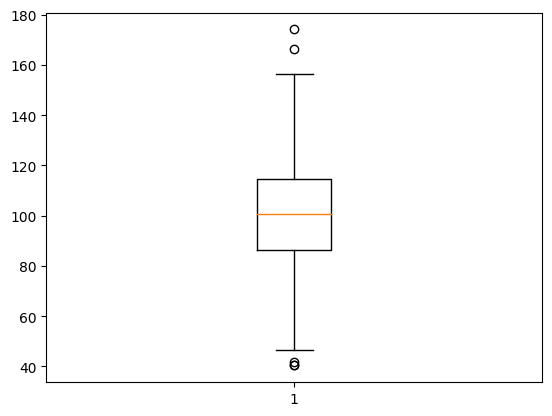

In [92]:
plt.boxplot(data)
# IQR : Inter Quatile Range 사분위 범위

In [93]:
# 표본데이터 기술 통계량
describe(data)

# nobs=갯수
# minmax=(최소값, 최대값)
# mean=평균
# variance=분산
# skewness=왜도
# kurtosis=첨도

DescribeResult(nobs=1000, minmax=(40.32059590236073, 174.0491647519972), mean=100.34568665961667, variance=407.156912917002, skewness=-0.007269929512760363, kurtosis=-0.06928694200380514)

In [94]:
df["english"].describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
Name: english, dtype: float64

In [95]:
# 소수점 3번째 까지만 출력

# np.set_printoptions(precision=3)
# np.options.display.float_format=":.3f".format
# np.set_printoptions(formatter={"float_kind":lambda x: "0:0.3f".format(x)})

%precision 3

'%.3f'

In [96]:
np.min(data)
np.max(data)

40.321

174.049

In [97]:
# 범위(Range)
np.max(data) - np.min(data)

133.729

In [101]:
# 범위 구하는 또 다른 방법 ptp : peak to peak
np.ptp(data)

133.729

In [102]:
# 범위의 중간
np.max(data) + np.min(data)/2

194.209

In [103]:
# 사분위 범위 (1)
np.quantile(data, 0.75) - np.quantile(data, 0.25)

28.362

In [104]:
# 사분위 범위 (2)
iqr(data)

28.362

In [105]:
# 편차 (데이터와 평균의 거리)
data - np.mean(data)

array([ 3.543e+01,  8.385e+00,  1.584e+00, -3.762e+01, -5.893e+00,
       -7.441e+00, -2.001e+00, -1.289e+01, -1.222e+00, -9.890e+00,
       -2.662e+01,  1.735e+01,  1.728e+01,  3.385e+01,  6.550e-01,
       -8.439e+00, -1.125e+01, -3.128e+01,  1.930e+01, -2.237e+01,
       -2.405e+01, -4.459e+00,  2.938e+01,  4.389e+00, -2.082e+01,
       -1.461e+01,  1.216e+01, -3.556e+00, -1.572e+01, -4.946e+00,
        1.456e+01,  3.918e+01, -2.523e+01, -1.287e+01, -1.642e+01,
       -4.873e+01, -1.882e+01, -2.082e+01,  2.213e+01, -2.984e+00,
       -3.281e+01,  1.259e+01, -7.471e+00, -3.521e+01, -1.228e+01,
       -1.212e+01, -1.782e+01,  2.486e-01, -4.531e+01, -5.701e+00,
        1.992e+01,  1.671e+01,  2.182e+01,  2.204e+01,  2.941e+01,
       -2.271e+01,  1.657e+01, -3.756e+01, -1.240e+01, -3.864e+01,
        2.062e+01,  2.633e+01, -4.294e+00,  3.515e+01, -1.384e+01,
        2.667e+00,  2.713e+00, -2.163e+01,  8.413e+00,  3.843e+01,
       -2.084e+01,  1.764e+01, -3.436e+00,  3.505e+01,  9.330e

In [106]:
(data - np.mean(data)).sum()

0.000

In [107]:
x = [1, 2, 3, 4, 5]

In [109]:
# 모분산 (전체)
np.var(x)
np.array(x).var()

# 표본분산
pd.Series(x).var()
np.var(x, ddof=1)

# np에서는 ddof default : 0 (모)
# pd에서는 ddof default : 1 (표본)

2.000

2.000

2.500

2.500

In [110]:
np.std(x)
np.array(x).std()

# 모집단에 대한 표준편차 확인
pd.Series(x).std(ddof=0)

1.414

1.414

1.414

In [111]:
men = [72, 74, 77, 68, 66, 75]
women = [45, 48, 52, 53, 46, 50]

In [113]:
np.mean(men)
np.mean(women)

72.000

49.000

In [114]:
np.std(men)
np.std(women)

3.873

2.944

In [115]:
# 변동계수 : 편차를 비교하기 위함
# 편차가 크면 데이터가 넓게 분포, 편차가 작으면 데이터가 좁게 분포
np.std(men)/np.mean(men)
np.std(women)/np.mean(women)

0.054

0.060

In [116]:
df = pd.read_csv("students.csv", index_col="student number")
df

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76
6,48,60
7,65,81
8,49,66
9,65,78


In [117]:
# 이건 배우지 않고 넘어감
z1 = (df["english"] - df["english"].mean()) / df["english"].std()
z1

student number
1    -1.671461
2     1.083694
3    -0.242862
4    -1.773503
5    -0.140819
6    -1.059204
7     0.675523
8    -0.957161
9     0.675523
10   -0.038776
11    1.185737
12   -1.161247
13   -0.753076
14    0.573480
15    0.369395
16    1.185737
17    1.287780
18    0.981651
19    1.491865
20   -2.181674
21    0.675523
22    0.675523
23    0.267352
24   -0.651033
25   -0.140819
26   -0.140819
27    1.695951
28    0.267352
29   -1.161247
30   -0.446947
31    0.777566
32   -0.446947
33   -0.446947
34   -1.671461
35   -2.181674
36    2.104122
37   -0.242862
38    0.369395
39    0.369395
40   -0.344905
41    0.471438
42   -0.140819
43   -0.140819
44    0.879609
45   -0.344905
46   -1.365332
47    0.777566
48   -0.344905
49    0.573480
50    0.777566
Name: english, dtype: float64

In [119]:
x1 = [1]*30 + [2]*20 + [3]*20 + [4]*15 + [5]*15
x2 = [1]*15 + [2]*20 + [3]*30 + [4]*20 + [5]*15
x3 = [1]*15 + [2]*15 + [3]*20 + [4]*20 + [5]*30

print(x1)
print(x2)
print(x3)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [120]:
%matplotlib inline

<Axes: >

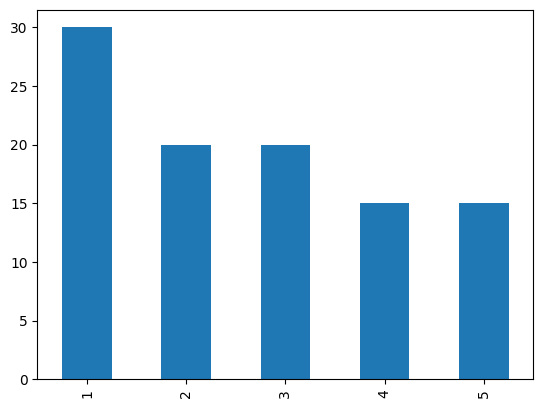

In [121]:
# 오른쪽으로 꼬리가 긴 분포
# 왜도가 플러스로 나오면 오른쪽으로 꼬리가 긴 분포가 됨
# right skewed (positive 양의 왜도)
pd.Series(x1).value_counts(sort=False).plot(kind="bar")

<Axes: >

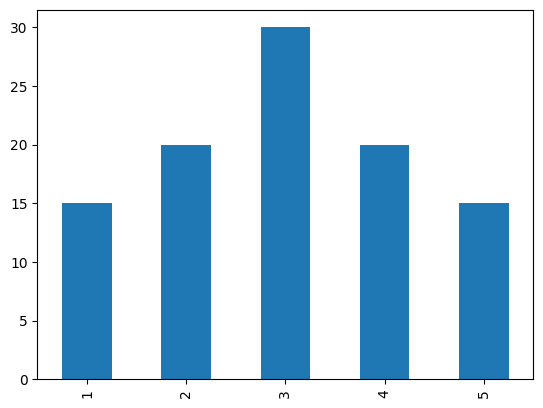

In [122]:
# 좌우 대칭 분포
pd.Series(x2).value_counts(sort=False).plot(kind="bar")


<Axes: >

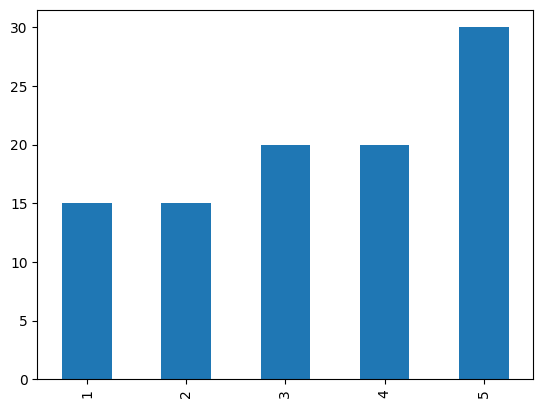

In [123]:
# 왼쪽으로 꼬리가 긴 분포
# left skewed (negative 양의 왜도)
pd.Series(x3).value_counts(sort=False).plot(kind="bar")


In [126]:
# 왜도가 0일수록 정규분포에 가깝게 만들어져 있음
skew(x1)
skew(x2)
skew(x3)


0.319

0.000

-0.319

In [129]:
x1 = [1]*20 + [2]*20 + [3]*20 + [4]*20 + [5]*20
x2 = [1]*10 + [2]*20 + [3]*30 + [4]*20 + [5]*10
x3 = [1]*10 + [2]*15 + [3]*70 + [4]*15 + [5]*10
print(x1)
print(x2)
print(x3)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


<Axes: >

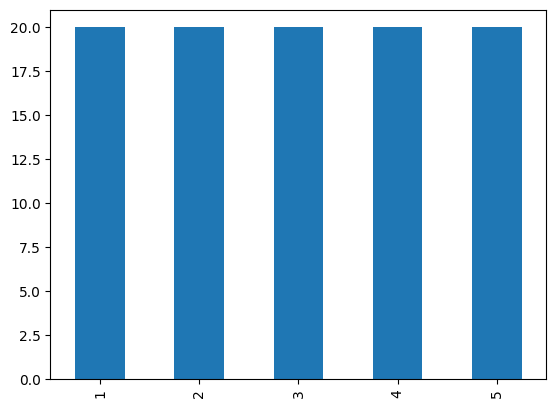

In [130]:
pd.Series(x1).value_counts(sort=False).plot(kind="bar")

<Axes: >

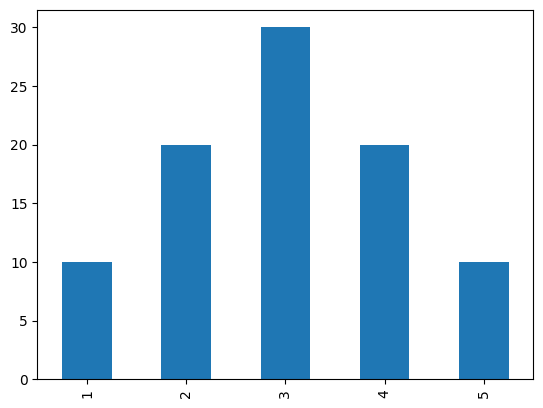

In [131]:
pd.Series(x2).value_counts(sort=False).plot(kind="bar")

<Axes: >

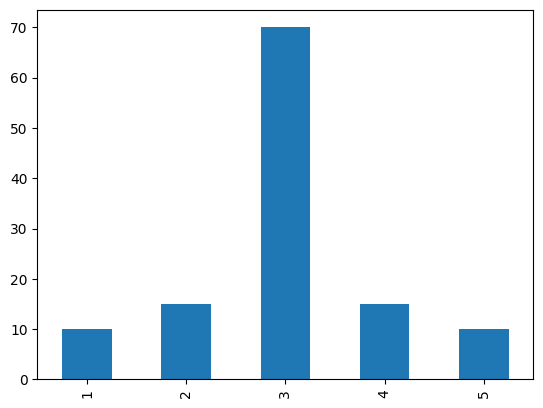

In [132]:
pd.Series(x3).value_counts(sort=False).plot(kind="bar")


In [133]:
# 첨도
kurtosis(x1)
kurtosis(x2)
kurtosis(x3)

-1.300

-0.750

0.471

In [134]:
eng = df["english"]
eng

student number
1     42
2     69
3     56
4     41
5     57
6     48
7     65
8     49
9     65
10    58
11    70
12    47
13    51
14    64
15    62
16    70
17    71
18    68
19    73
20    37
21    65
22    65
23    61
24    52
25    57
26    57
27    75
28    61
29    47
30    54
31    66
32    54
33    54
34    42
35    37
36    79
37    56
38    62
39    62
40    55
41    63
42    57
43    57
44    67
45    55
46    45
47    66
48    55
49    64
50    66
Name: english, dtype: int64

In [135]:
np.histogram(eng, bins=10, range=(0, 100))
# 0번지에는 각각 구간별 개수, 1번지에는 구간의 개수

(array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]))

In [145]:
# 안 쓰는 건 _에 저장
freq, _ = np.histogram(eng, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [137]:
# 몇 번씩 나오는지 빈도 구하기
freq_class = [f"{i} ~ {i + 10}" for i in range(0, 100, 10)]
freq_dist_df = pd.DataFrame({"frequency" : freq}, index=freq_class)
freq_dist_df

,frequency
0 ~ 10,0
10 ~ 20,0
20 ~ 30,0
30 ~ 40,2
40 ~ 50,8
50 ~ 60,16
60 ~ 70,18
70 ~ 80,6
80 ~ 90,0
90 ~ 100,0


In [139]:
# 상대 도수 (도수분포표를 %로 만든 것)
# 다 더하면 1이 됨
rel_freq = freq/freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [140]:
# 누적 상대도수
# 상대도수를 누적한 것
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  3.,  3.,  3.,
         7.,  8.,  6., 10.,  5.,  2.,  1.,  0.,  0.,  0.,  0.,  0.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100.]),
 <BarContainer object of 25 artists>)

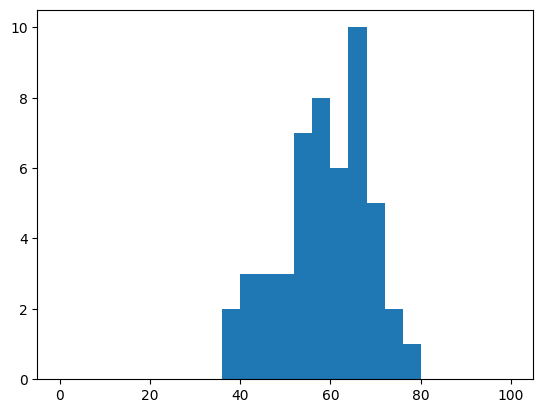

In [143]:
plt.hist(eng, bins=25, range=(0, 100))

(array([ 0.,  0.,  0.,  2.,  8., 16., 18.,  6.,  0.,  0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

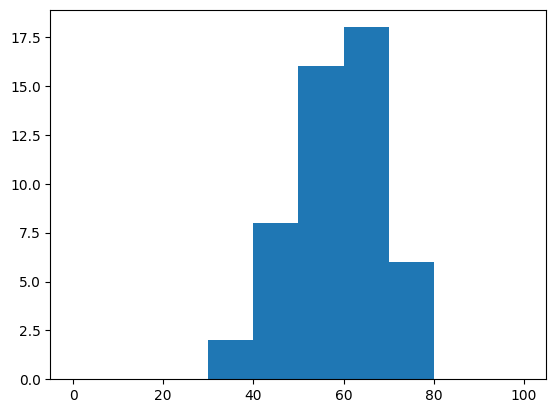

In [144]:
plt.hist(eng, bins=10, range=(0, 100))

{'whiskers': [<matplotlib.lines.Line2D at 0x224b6256710>,
 'caps': [<matplotlib.lines.Line2D at 0x224b6256c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x224b6256470>],
 'medians': [<matplotlib.lines.Line2D at 0x224b6257190>],
 'fliers': [<matplotlib.lines.Line2D at 0x224b6257430>],
 'means': []}

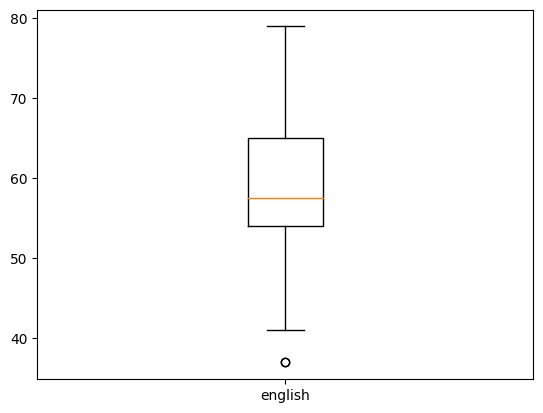

In [147]:
plt.boxplot(eng, labels=["english"])